In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-orthogonal-approx)

Let's approximate $e^x$ over the interval $[−1,1]$. We can sample it at, say, 15 points, and find the best-fitting straight line to that data.

fit coeffs: [1.20159125 1.11828384]


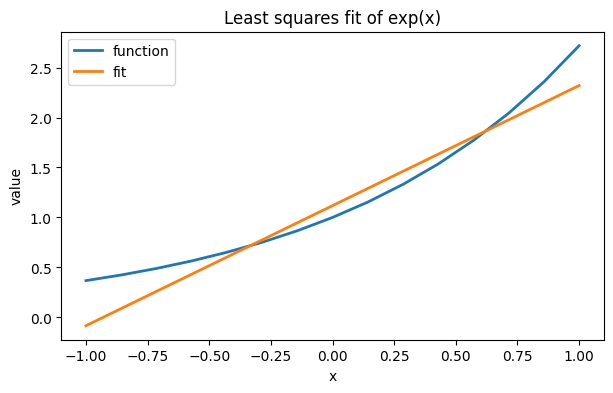

In [2]:
from numpy.linalg import lstsq
t = linspace(-1, 1, 15)
y = exp(t)
plot(t, y, label="function")

V = [[ti**j for j in range(2)] for ti in t]
c = lstsq(V, y, rcond=None)[0]
print("fit coeffs:", c)

x = linspace(-1, 1, 600)
plot(x, c[1] + c[0] * x, label="fit")
xlabel("x"),  ylabel("value")
legend(),  title("Least squares fit of exp(x)");

There's nothing special about 15 points. Choosing more doesn't change the result much.

fit coeffs: [1.17767125 1.10507318]


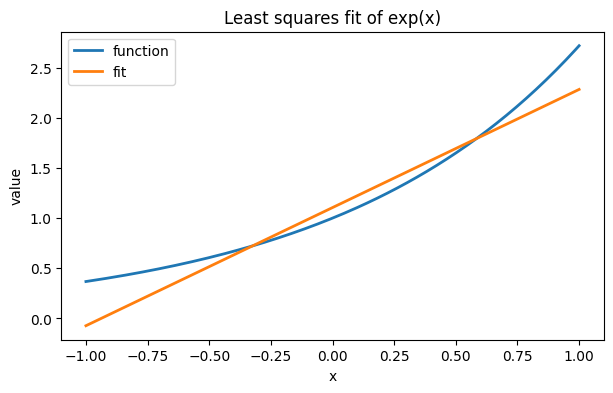

In [3]:
t = linspace(-1, 1, 150)
y = exp(t)
plot(t, y, label="function")

V = [[ti**j for j in range(2)] for ti in t]
c = lstsq(V, y, rcond=None)[0]
print("fit coeffs:", c)

x = linspace(-1, 1, 600)
plot(x, c[1] + c[0] * x, label="fit")
xlabel("x"),  ylabel("value")
legend(),  title("Least squares fit of exp(x)");

This situation is unlike interpolation, where the degree of the interpolant increases with the number of nodes. Here, the linear fit is apparently approaching a limit that we may think of as a continuous least-squares fit.

In [4]:
n = arange(40, 420, 60)
results = PrettyTable(["n", "intercept", "slope"])
slope = zeros(n.size)
intercept = zeros(n.size)

for k in range(n.size):
    t = linspace(-1, 1, n[k])
    y = exp(t)
    V = [[ti**j for j in range(2)] for ti in t]
    c = lstsq(V, y, rcond=None)[0]
    results.add_row([n[k], c[1], c[0]])

print(results)

+-----+--------------------+--------------------+
|  n  |     intercept      |       slope        |
+-----+--------------------+--------------------+
|  40 | 1.1090551764670025 | 1.1846492800335242 |
| 100 | 1.105793288180965  | 1.1789195568501283 |
| 160 | 1.1049832955976737 | 1.1775158384490085 |
| 220 | 1.1046158595861273 | 1.176881503540092  |
| 280 | 1.1044061059639807 | 1.1765200632992356 |
| 340 | 1.1042704646318244 | 1.1762865906944795 |
| 400 | 1.1041755539295632 | 1.1761233467177028 |
+-----+--------------------+--------------------+
